In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [51]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [52]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [53]:
df1  = data.copy()
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [54]:
df1.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

##### plotting missing values

<Axes: >

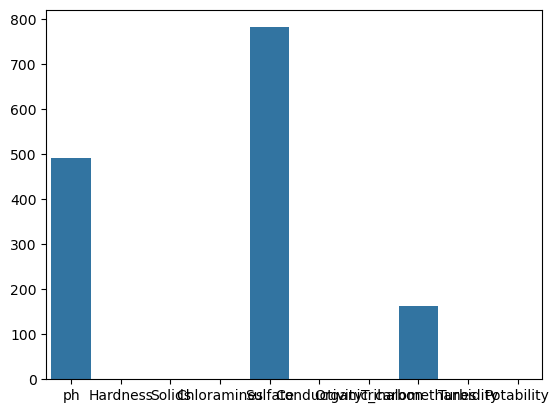

In [55]:
sns.barplot(df1.isna().sum())

7.080794504276835 7.036752103833548


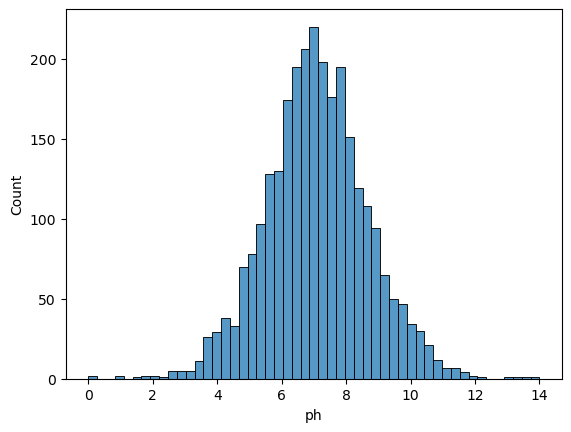

In [56]:
sns.histplot(df1['ph'])
print(df1['ph'].mean(), df1['ph'].median())

333.7757766108135 333.073545745888


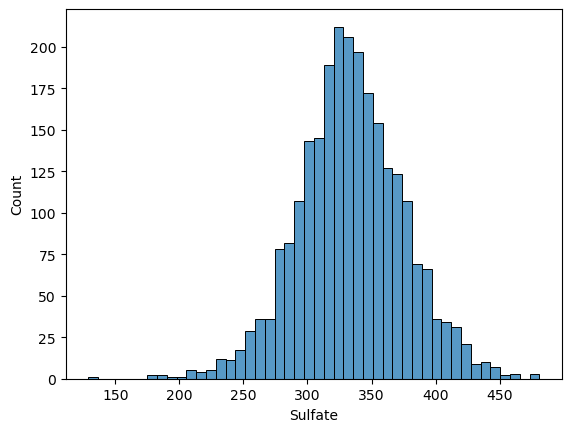

In [57]:
sns.histplot(df1['Sulfate'])
print(df1['Sulfate'].mean(), df1['Sulfate'].median())

66.39629294676803 66.62248509808484


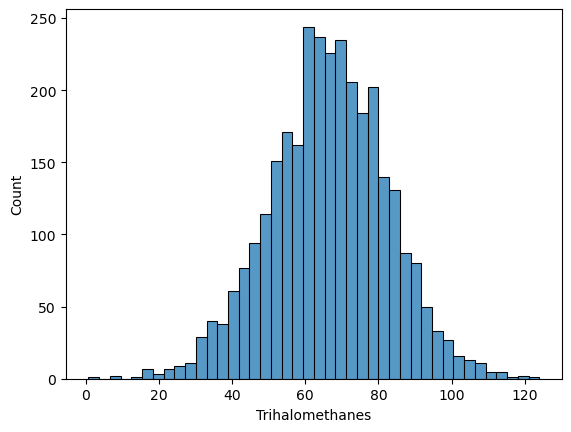

In [58]:
sns.histplot(df1['Trihalomethanes'])
print(df1['Trihalomethanes'].mean(), df1['Trihalomethanes'].median())

<Axes: ylabel='ph'>

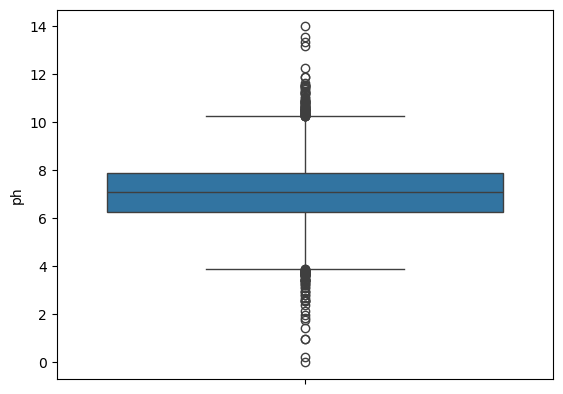

In [59]:
df1['ph'] = df1['ph'].fillna(df1['ph'].mean())
sns.boxplot(df1['ph'])

In [60]:
df1['Sulfate'] = df1['Sulfate'].fillna(df1['Sulfate'].mean())
df1['Trihalomethanes'] = df1['Trihalomethanes'].fillna(df1['Trihalomethanes'].mean())

In [61]:
df1.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [62]:
print(type(df1.skew(axis = 0)))
print(f'Number of skewed columns : {(abs(df1.skew(axis = 0, skipna = True)) >= 1).sum()}')
df1.skew(axis = 0, skipna = True)
# (abs(df1.skew(axis = 0)) >= 1).sum()

<class 'pandas.core.series.Series'>
Number of skewed columns : 0


ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64

In [63]:
df1['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [64]:
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [67]:
from sklearn.preprocessing import RobustScaler
df2 = pd.DataFrame(RobustScaler().fit_transform(df1), columns = df1.columns)

In [71]:
import os.path
if not os.path.isfile('cleaned_data.csv'):
    df2.to_csv('cleaned_data.csv')

In [74]:
stats.ttest_ind(df2['ph'], df2['Solids'])

TtestResult(statistic=-4.476932191647956, pvalue=7.700634902878753e-06, df=6550.0)

the p value is less than 0.05 , so we are rejecting the null hypothesis at 5% significance level.